<h2> Data exploration marketing Campaing</h2>

In [499]:
import pandas as pd
import numpy as np
import os
import pathlib
import datetime
import matplotlib.pyplot as plt

<h4>Read the raw data</h4>

In [500]:
# Read the csv raw file
# Get the base path of the project Ex. /home/ubuntu/taller_3
base_path = os.getcwd()
# Combine the base path with th file path
data_path = '/../data/raw/marketing_campaign.csv'
full_path = ''.join([base_path,data_path])
file_path = os.path.realpath(full_path)
# read the data using pandas
df_raw = pd.read_csv(file_path,sep=';')
df_raw.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [501]:
# Initial description of the data
# Dataset Columns name
print(f'Dataset Columns Name: {list(df_raw.columns)}\n')
# Number of rows in the dataset
print(f"Number of rows in the dataset {len(df_raw)}")
# dtypes Series to get the types of the data
display("Types of data of each Column",df_raw.dtypes)

Dataset Columns Name: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

Number of rows in the dataset 2240


'Types of data of each Column'

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [502]:
# Descriptions of each column


In [503]:
# Identify null values by column
df_raw.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<h4>Get unique values for each Column to get a broader knowledge about them</h4>

In [504]:
# Unique values some columns related to personal information
personal_information_columns = ['Education', 'Marital_Status']
for col in personal_information_columns:
    print(f"Unique values of column: {col}\n {df_raw[col].unique()}\n")


Unique values of column: Education
 ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Unique values of column: Marital_Status
 ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']



Education Columns Categories: Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


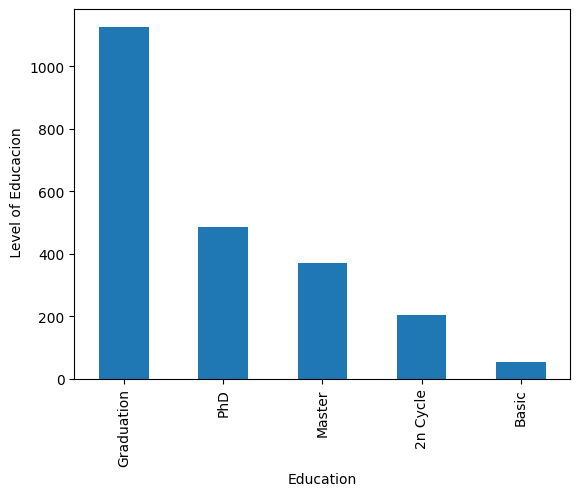

In [505]:
# Description Education
# Count Values for Education
print(f"Education Columns Categories: {df_raw['Education'].value_counts()}")
# Plot histogram
fig, ax = plt.subplots()
ax.set_ylabel(' Level of Educacion')
df_raw['Education'].value_counts().plot(kind='bar', ax=ax)
plt.show()


Marital Status Columns Categories: Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


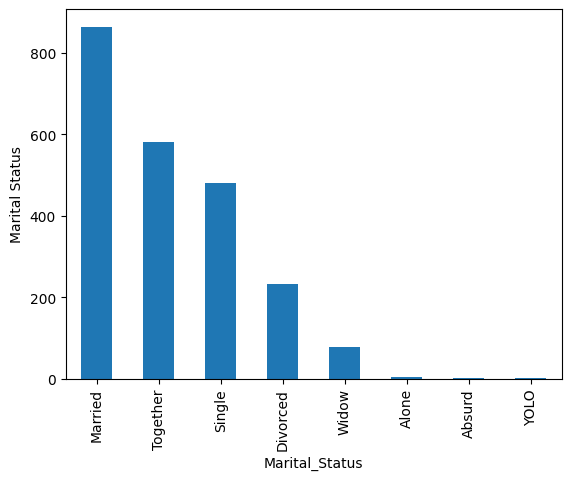

In [506]:
# Description Education
# Count Values for Education
print(f"Marital Status Columns Categories: {df_raw['Marital_Status'].value_counts()}")
# Plot histogram
fig, ax = plt.subplots()
ax.set_ylabel('Marital Status')
df_raw['Marital_Status'].value_counts().plot(kind='bar', ax=ax)
plt.show()

<p>The another columns related to personal information should be presented in <br>
plot due to its naturallity, because get a list of unique incomes or date of <br> birth could be wierd<p>

In [507]:
def years_2_age(year):
    # Get current datetime
    current_year = datetime.datetime.today().year
    # calculate the aprox year
    aprox_year = current_year - year
    return aprox_year

In [508]:
# Using the date of birth get the aprox. age
df_raw['age'] = df_raw['Year_Birth'].map(years_2_age)
# Basic Description
print(f"Description Age Column:\n{df_raw['age'].describe()}\n")

Description Age Column:
count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: age, dtype: float64



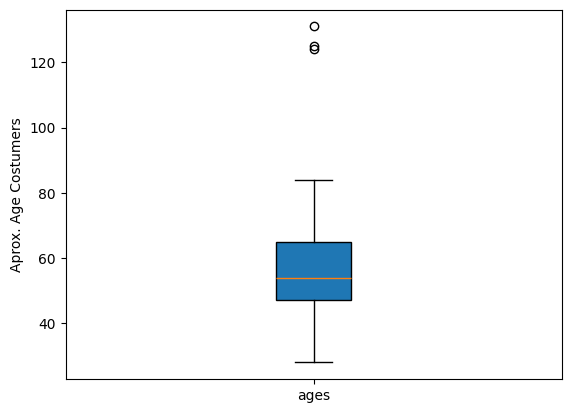

In [509]:
# Make a BoxPlot to identify visually the outliers
fig, ax = plt.subplots()
ax.set_ylabel('Aprox. Age Costumers')
labels = ['ages']
bplot = ax.boxplot(df_raw['age'], patch_artist=True, tick_labels=labels)
plt.show()


<p> According to the description and information found in the data should be <br>
see if there is a relation of data between the user with years over 80 and under<br> that age, get user with more thatn 100 years could be consider as a fake data</p>

Description Income Column:
count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


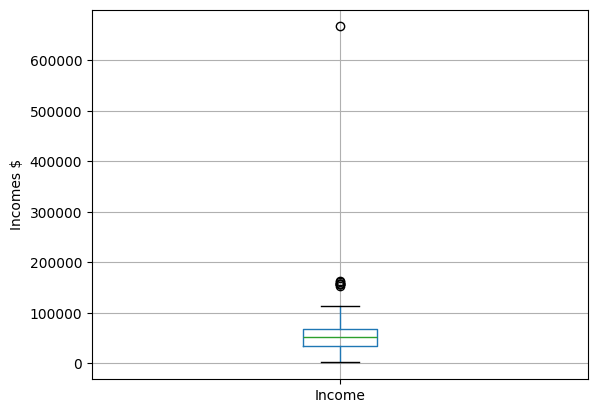

In [510]:
# Description income
print(f"Description Income Column:\n{df_raw['Income'].describe()}")
# BoxPlot to make the description
fig, ax = plt.subplots()
ax.set_ylabel('Incomes $')
labels = ['Incomes']
df_raw.boxplot(column='Income',ax=ax)
plt.show()

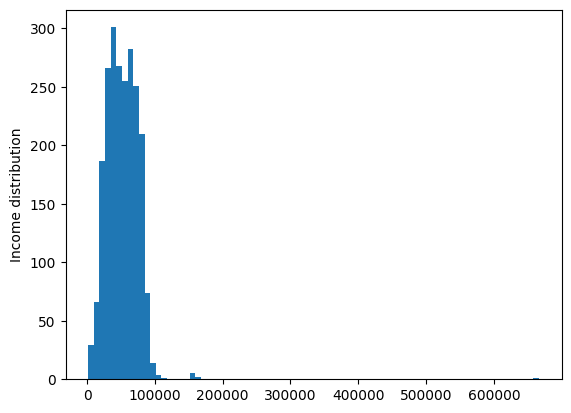

In [511]:
# Plot a distribution 
fig, ax = plt.subplots()
ax.set_ylabel("Income distribution")
ax.hist(df_raw['Income'], bins=80)
plt.show()

Count categories:
Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64
Count categories %:
Kidhome
0    57.723214
1    40.133929
2     2.142857
Name: count, dtype: float64


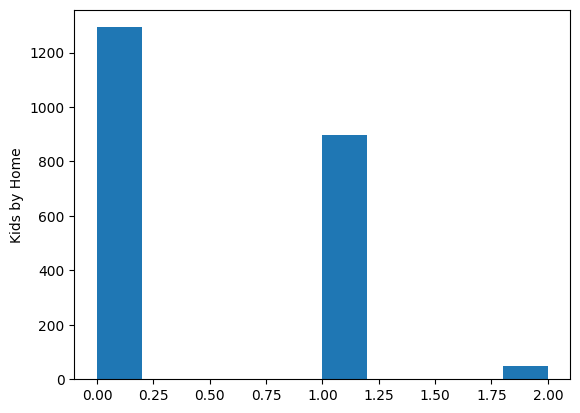

In [512]:
# Description KidHome
# Use the Kidhome columns as category and count the number o occurance in each category
print(f"Count categories:\n{df_raw['Kidhome'].value_counts()}")
# Categories %
rows_recored = len(df_raw['Kidhome'])
print(f"Count categories %:\n{df_raw['Kidhome'].value_counts().div(rows_recored).mul(100)}")
# To display this information would be better use a histogram
fig, ax = plt.subplots()
ax.set_ylabel('Kids by Home')
# labels = ['Kidhome']
bplot = ax.hist(df_raw['Kidhome'])
plt.show()

Count categories:
Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64
Count categories %:
Teenhome
0    51.696429
1    45.982143
2     2.321429
Name: count, dtype: float64


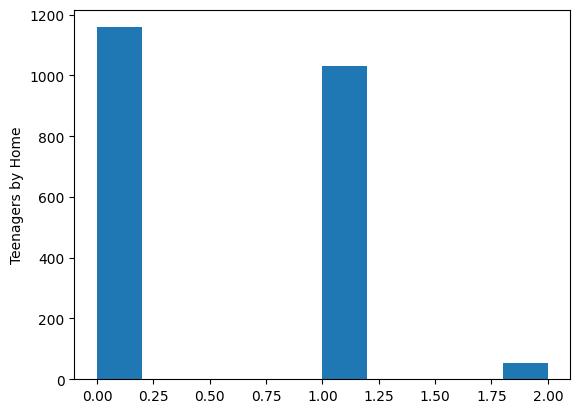

In [513]:
# Description TeenHome
# Count vlues by category
print(f"Count categories:\n{df_raw['Teenhome'].value_counts()}")
# Categories %
rows_recored = len(df_raw['Teenhome'])
print(f"Count categories %:\n{df_raw['Teenhome'].value_counts().div(rows_recored).mul(100)}")
# Plot values by each category
# To display this information would be better use a histogram
fig, ax = plt.subplots()
ax.set_ylabel('Teenagers by Home')
# labels = ['Kidhome']
bplot = ax.hist(df_raw['Teenhome'])
plt.show()

<h3>Conclusion For personal Information</h3>
<ul>
    <li>In marital status we can find 2 registers inside the category YOLO and 2 register inside absurd, could be meaning that the costurmer did not want to offer that information.</li>
    <li>In the ages Columns there are values ocer 100 years, that information could be consider, a ramdom information filled by the costumers</li>
    <li>In the case of the Income variables, the statistics and plots shows that the bigger part of the costumer are between 35303 and 68552, another small quantity are over 100000 and one register that is the maximum value could be consider as fake data.</li>
    <li>According to the results, 57% of the costumes have not childrens, while the remaining categories, 1 kid(40%) and 2 children(2%)</li>
    <li>According to the plot and % calculated by category, we could say that 50% percent have not any teenager, whereas the remaining categories get a pecentage of 46% one teenager and 2% get 2 teenagers</li>
</ul>

<h3>Missing values for income</h3>
<p> According to the description of each column and the information found, the next step would be find the best value for the missing records, and try to 
change the values that looks unusual like age over 100, wierd answer for the marital status.</p>
<p> Make a groupby for each personal information column and see if there is a relation between personal information and income<br>
<ul>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
</ul>
Group by age, Education ,Marital_Status ,Income ,Kidhome,Teenhome </p>

In [514]:
df_raw[['Education','Income']].groupby(['Education']).mean()

,Income
Education,
2n Cycle,47633.190000
Basic,20306.259259
Graduation,52720.373656
Master,52917.534247
PhD,56145.313929


In [515]:
df_raw[['Marital_Status','Income']].groupby(['Marital_Status']).mean()

,Income
Marital_Status,
Absurd,72365.500000
Alone,43789.000000
Divorced,52834.228448
Married,51724.978996
Single,50995.350318
Together,53245.534031
Widow,56481.552632
YOLO,48432.000000


In [516]:
df_raw[['Kidhome','Income']].groupby(['Kidhome']).mean()

,Income
Kidhome,
0,61779.858145
1,39138.076663
2,39149.500000


In [517]:
df_raw[['Teenhome','Income']].groupby(['Teenhome']).mean()

,Income
Teenhome,
0,51888.334786
1,52485.755403
2,55558.627451


In [518]:
# Create Categories by age and get the mean income
age_max = max(df_raw['age'])
categories_age = [f"{i} - {i+9}" for i in range(10, age_max, 10)]
df_raw["age_group"] = pd.cut(df_raw['age'], range(10, age_max+15, 10), right=False, labels=categories_age)
df_raw['age_group'].value_counts()

age_group
50 - 59      676
40 - 49      557
60 - 69      467
70 - 79      300
30 - 39      214
80 - 89       16
20 - 29        7
120 - 129      2
130 - 139      1
10 - 19        0
90 - 99        0
110 - 119      0
100 - 109      0
Name: count, dtype: int64

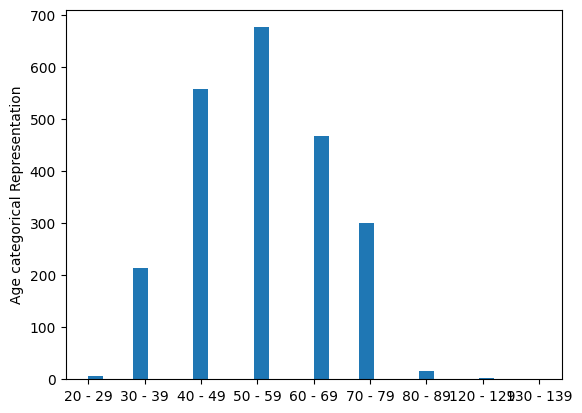

In [519]:
# To display this information would be better use a histogram
fig, ax = plt.subplots()
ax.set_ylabel('Age categorical Representation')
# labels = ['Kidhome']
bplot = ax.hist(df_raw['age_group'].sort_values(), bins=30)
plt.show()

In [520]:
#Relation between age categorical and income
df_raw[['age_group', 'Income']].groupby(['age_group']).mean()

C:\Users\hecto\AppData\Local\Temp\ipykernel_50952\4038978605.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_raw[['age_group', 'Income']].groupby(['age_group']).mean()


,Income
age_group,
10 - 19,NaN
20 - 29,46658.000000
30 - 39,46283.028302
40 - 49,49224.877034
50 - 59,50812.913303
60 - 69,56200.827887
70 - 79,58611.134228
80 - 89,65563.533333
90 - 99,NaN


In [521]:
# Group by all the personal information columns

In [522]:
df_raw[['age_group', 'Kidhome','Income']].groupby(['age_group','Kidhome']).mean()

C:\Users\hecto\AppData\Local\Temp\ipykernel_50952\3376549131.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_raw[['age_group', 'Kidhome','Income']].groupby(['age_group','Kidhome']).mean()


Income
age_group Kidhome              
10 - 19   0                 NaN
          1                 NaN
          2                 NaN
20 - 29   0        46658.000000
          1                 NaN
          2                 NaN
30 - 39   0        61119.509434
          1        31446.427184
          2        31450.666667
40 - 49   0        63660.936441
          1        38393.867314
          2        41708.875000
50 - 59   0        61403.937500
          1        40365.199357
          2        36751.772727
60 - 69   0        60722.942529
          1        42594.067961
          2        34675.875000
70 - 79   0        62419.866953
          1        43923.016667
          2        57381.600000
80 - 89   0        65563.533333
          1                 NaN
          2                 NaN
90 - 99   0                 NaN
          1                 NaN
          2                 NaN
100 - 109 0                 NaN
          1                 NaN
          2                 NaN
110 - 119 0                 NaN
          1                 NaN
          2                 NaN
120 - 129 0        83532.000000
          1        36640.000000
          2                 NaN
130 - 139 0        60182.000000
          1                 NaN
          2                 NaN

In [523]:
df_raw[['Education', 'Kidhome','Income']].groupby(['Education','Kidhome']).mean()

Income
Education  Kidhome              
2n Cycle   0        57892.231481
           1        35401.191011
           2        41190.333333
Basic      0        21814.100000
           1        19419.294118
Graduation 0        62328.710974
           1        39660.589686
           2        35679.913043
Master     0        61582.777778
           1        41775.040268
           2        38087.111111
PhD        0        64786.059801
           1        41369.278107
           2        46716.727273

In [524]:
df_raw[['Marital_Status', 'Kidhome','Income']].groupby(['Marital_Status','Kidhome']).mean()

Income
Marital_Status Kidhome              
Absurd         0        72365.500000
Alone          1        43789.000000
Divorced       0        62056.264286
               1        39017.840909
               2        34023.500000
Married        0        61536.229508
               1        38768.862464
               2        38414.700000
Single         0        62171.398496
               1        36316.446154
               2        39951.100000
Together       0        62003.562691
               1        41613.452991
               2        41414.833333
Widow          0        60200.844828
               1        44497.166667
YOLO           0        48432.000000

In [525]:
pd.pivot_table(df_raw, values='Income', index=['Education','Marital_Status'],
               columns=['Kidhome','Teenhome'], aggfunc='mean')

Kidhome                               0                              \
Teenhome                              0             1             2   
Education  Marital_Status                                             
2n Cycle   Divorced        59145.333333  64122.500000           NaN   
           Married         57782.269231  54814.875000  45894.000000   
           Single          69892.833333  57427.625000           NaN   
           Together        49695.000000  60610.600000           NaN   
           Widow           51658.000000  53433.000000           NaN   
Basic      Divorced                 NaN           NaN           NaN   
           Married         22699.222222  30801.000000           NaN   
           Single          15743.500000  23529.000000           NaN   
           Together        21826.200000  14918.000000           NaN   
           Widow           22123.000000           NaN           NaN   
Graduation Absurd          79244.000000           NaN           NaN   
           Alone                    NaN           NaN           NaN   
           Divorced        67422.612903  60694.372093  62204.000000   
           Married         62732.791304  58413.685950  54741.285714   
           Single          64306.976744  57231.964912           NaN   
           Together        74138.746667  58181.809524  64300.000000   
           Widow           64676.333333  56228.083333           NaN   
Master     Absurd          65487.000000           NaN           NaN   
           Alone                    NaN           NaN           NaN   
           Divorced        54278.700000  60439.800000           NaN   
           Married         70618.366667  57844.317073  56910.800000   
           Single          70566.172414  58401.454545  59247.000000   
           Together        64654.038462  52579.323529           NaN   
           Widow           60359.250000  57078.750000  73705.000000   
PhD        Alone                    NaN           NaN           NaN   
           Divorced        69957.181818  56513.176471  60141.333333   
           Married         75730.408163  62479.734375  73194.666667   
           Single          67627.000000  54018.761905   7144.000000   
           Together        73494.655172  57842.564103  53602.000000   
           Widow           74349.428571  57276.000000           NaN   
           YOLO                     NaN  48432.000000           NaN   

Kidhome                               1                              \
Teenhome                              0             1             2   
Education  Marital_Status                                             
2n Cycle   Divorced        28194.833333  33022.333333           NaN   
           Married         28751.791667  46308.909091           NaN   
           Single          35475.900000  45434.600000           NaN   
           Together        31674.437500  42117.461538           NaN   
           Widow                    NaN  46779.000000           NaN   
Basic      Divorced         9548.000000           NaN           NaN   
           Married         20411.600000           NaN           NaN   
           Single          18631.538462  15535.000000           NaN   
           Together        21664.000000           NaN           NaN   
           Widow                    NaN           NaN           NaN   
Graduation Absurd                   NaN           NaN           NaN   
           Alone           34176.000000           NaN           NaN   
           Divorced        33786.800000  46144.578947  37859.000000   
           Married         34279.174757  43797.942029  55469.500000   
           Single          32272.388060  44778.000000  66571.666667   
           Together        44376.750000  41286.604167  49838.500000   
           Widow           38782.000000  43974.000000           NaN   
Master     Absurd                   NaN           NaN           NaN   
           Alone                    NaN  61331.000000           NaN   
           Divorced    

<h3>Conclusion</h3>
<p>The average income is considerable lower when there is 1 or 2 kids at home</p>


<p>Getting a representation between income and personal information, it is time to check the missing values and try to assing an Income value related to its columns</p>

In [526]:
# Get the records with the missing values
filter_income_null = df_raw['Income'].isnull()
df_missing_values = df_raw[filter_income_null]
df_missing_values.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,age_group
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,0,0,0,0,3,11,0,41,40 - 49
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,0,0,0,3,11,0,38,30 - 39
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,0,0,0,0,0,3,11,0,65,60 - 69
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,0,0,0,0,0,3,11,0,73,70 - 79
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,0,0,0,0,3,11,0,42,40 - 49


In [527]:
# Groupby some personal information columns to count 
df_missing_values[['Education','Kidhome','Teenhome','Marital_Status']].groupby(['Education','Kidhome','Teenhome','Marital_Status']).count()

Empty DataFrame
Columns: []
Index: [(2n Cycle, 0, 0, Together), (2n Cycle, 1, 0, Married), (2n Cycle, 1, 1, Single), (Graduation, 0, 0, Married), (Graduation, 0, 1, Married), (Graduation, 0, 1, Single), (Graduation, 1, 0, Married), (Graduation, 1, 0, Single), (Graduation, 1, 1, Married), (Graduation, 1, 1, Single), (Graduation, 1, 1, Together), (Graduation, 1, 2, Single), (Graduation, 2, 1, Single), (Master, 0, 0, Together), (Master, 0, 0, Widow), (Master, 0, 1, Together), (Master, 1, 1, Together), (PhD, 0, 0, Single), (PhD, 0, 1, Married), (PhD, 1, 0, Single), (PhD, 1, 0, Together), (PhD, 2, 1, Married)]

<p>According to the information in the pivot table, There is a significant difference between the costumer with Kids and without, for that reason, the records with the missing income data would be split into costumers with and wihtouth kids, Then I am going to assing a value according to the pivot table</p>

In [528]:
# split the records wiht missing data between Kidhome == 0 and Kidhome >0
df_missing_values_eq_zero = df_missing_values[df_missing_values['Kidhome'].eq(0)]
print(f" Records number {len(df_missing_values_eq_zero)}")
display(df_missing_values_eq_zero)

 Records number 10


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,age_group
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,0,0,0,0,0,3,11,0,65,60 - 69
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,0,0,0,0,0,3,11,0,51,50 - 59
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,0,0,0,0,0,3,11,0,63,60 - 69
133,1295,1963,Graduation,Married,NaN,0,1,2013-08-11,96,231,...,0,0,0,0,0,3,11,0,61,60 - 69
312,2437,1989,Graduation,Married,NaN,0,0,2013-06-03,69,861,...,1,0,1,0,0,3,11,0,35,30 - 39
1379,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,...,0,0,0,0,0,3,11,0,54,50 - 59
2079,10339,1954,Master,Together,NaN,0,1,2013-06-23,83,161,...,0,0,0,0,0,3,11,0,70,70 - 79
2081,3117,1955,Graduation,Single,NaN,0,1,2013-10-18,95,264,...,0,0,0,0,0,3,11,0,69,60 - 69
2084,5250,1943,Master,Widow,NaN,0,0,2013-10-30,75,532,...,0,1,0,0,0,3,11,1,81,80 - 89
2228,8720,1978,2n Cycle,Together,NaN,0,0,2012-08-12,53,32,...,1,0,0,0,0,3,11,0,46,40 - 49


In [529]:
# Add income value according to the pivot table 
# Get the max value from the pivot table related to  value 75730.408163
df_raw.loc[(df_raw['Income'].isna()) & (df_raw['Kidhome'].eq(0)),:'Income'] = 75730.408163

C:\Users\hecto\AppData\Local\Temp\ipykernel_50952\354692048.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '75730.408163' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_raw.loc[(df_raw['Income'].isna()) & (df_raw['Kidhome'].eq(0)),:'Income'] = 75730.408163
C:\Users\hecto\AppData\Local\Temp\ipykernel_50952\354692048.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '75730.408163' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_raw.loc[(df_raw['Income'].isna()) & (df_raw['Kidhome'].eq(0)),:'Income'] = 75730.408163


In [530]:
# split the records wiht missing data between Kidhome == 0 and Kidhome >0
df_missing_values_gt_zero = df_missing_values[df_missing_values['Kidhome'].gt(0)]
print(f" Records number {len(df_missing_values_gt_zero)}")
display(df_missing_values_gt_zero)

 Records number 14


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,age_group
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,0,0,0,0,3,11,0,41,40 - 49
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,0,0,0,3,11,0,38,30 - 39
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,0,0,0,0,0,3,11,0,73,70 - 79
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,0,0,0,0,3,11,0,42,40 - 49
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,0,0,0,0,3,11,0,51,50 - 59
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,0,0,0,0,0,3,11,0,67,60 - 69
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,0,0,0,0,3,11,0,67,60 - 69
319,2863,1970,Graduation,Single,NaN,1,2,2013-08-23,67,738,...,1,0,1,0,0,3,11,0,54,50 - 59
1382,2902,1958,Graduation,Together,NaN,1,1,2012-09-03,87,19,...,0,0,0,0,0,3,11,0,66,60 - 69
1383,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,...,0,0,0,0,0,3,11,0,60,60 - 69


In [531]:
# max value in a pivot table considering no basic in the Education column between 54814.875000,62479.734375
average_value = (54814.875000 + 62479.734375)/2
df_raw.loc[(df_raw['Income'].isna()) & (df_raw['Kidhome'].gt(0)),'Income'] = average_value 

In [534]:
df_raw.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
age_group              0
dtype: int64